# Evaluation of FactCheck (CoT) and ReAct (CoT+Agents)

In [1]:
import pandas as pd
import json

## Results for Amazon Titan

In [2]:
#factcheck
def transform_to_boolean(value):
    if 'false' in value.lower():
        return False
    elif 'true' in value.lower():
        return True
    else:
        return value
    
def count_matching_lines(dataframe):
    count = sum(dataframe['answer'] == dataframe['label'])
    return count

def evaluate_run(filename):
    # Load JSON data from the file
    with open(filename, 'r') as file:
        json_data = json.load(file)

    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])

    # Apply the transformation function to the third column
    df['answer'] = df['answer'].apply(transform_to_boolean)

    selected_columns = df.iloc[:, [0, 2, 3]]
    #print(selected_columns)

    # Get the count of matching lines
    matching_lines_count = count_matching_lines(df)

    print(f'Number of matching lines: {matching_lines_count}/{df.shape[0]}')
    return df

factcheck = 'fact-checker/wandb/run-20230827_082658-93t9woap/files/media/table/fakenews_generations_50_18d7a8ca7a4859a73926.table.json'
factcheck_titan = evaluate_run(factcheck)

react = 'react/wandb/run-20230827_082803-c6pmv1y1/files/media/table/fakenews_generations_50_87c144b7e201e28e3c53.table.json'
react_titan = evaluate_run(react)


result_titan = [count_matching_lines(factcheck_titan), count_matching_lines(react_titan)]
result_titan


Number of matching lines: 17/50
Number of matching lines: 20/50


[17, 20]

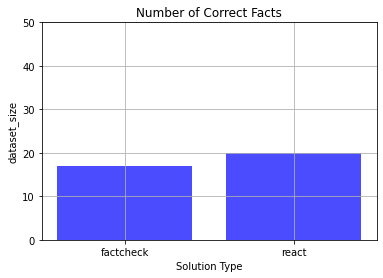

In [3]:
# Plotting values
import matplotlib.pyplot as plt
dataset_size = react_titan.shape[0]

def plot_bar_chart(x_labels, values):
    plt.bar(x_labels, values, color='blue', alpha=0.7)
    plt.xlabel('Solution Type')
    plt.ylabel('dataset_size')
    plt.title('Number of Correct Facts')
    plt.grid(True)
    # Set the maximum value on the y-axis
    plt.ylim(0, dataset_size)
    plt.show()

# Example input: categories and corresponding values
categories = ['factcheck', 'react']
values = result_titan

plot_bar_chart(categories, values)

## Results for Anthropic Claude

In [4]:
def transform_to_boolean(value):
    if 'false' in value.lower():
        return False
    elif 'true' in value.lower():
        return True
    else:
        return value
    
def count_matching_lines(dataframe):
    count = sum(dataframe['answer'] == dataframe['label'])
    return count

def evaluate_run(filename):
    # Load JSON data from the file
    with open(filename, 'r') as file:
        json_data = json.load(file)

    df = pd.DataFrame(json_data['data'], columns=json_data['columns'])

    # Apply the transformation function to the third column
    df['answer'] = df['answer'].apply(transform_to_boolean)

    selected_columns = df.iloc[:, [0, 2, 3]]
    #print(selected_columns)

    # Get the count of matching lines
    matching_lines_count = count_matching_lines(df)

    print(f'Number of matching lines: {matching_lines_count}/{df.shape[0]}')
    return df

factcheck_claude = './wandb/run-20230827_161119-rcmczg06/files/media/table/fakenews_generations_50_a8f121d09da9e6554c9f.table.json'
factcheck_claude = evaluate_run(factcheck_claude)

react_claude='./wandb/run-20230827_161052-bg62yukh/files/media/table/fakenews_generations_50_06a27af927bf89d64b09.table.json'
react_claude = evaluate_run(react_claude)

result_claude = [count_matching_lines(factcheck_claude), count_matching_lines(react_claude)]

#Open AI
factcheck_gpt35turbo = './fact-checker/wandb/run-20230828_085918-jhbn610i/files/media/table/fakenews_generations_50_7e14600a228d1a522cd3.table.json'
factcheck_gpt35turbo = evaluate_run(factcheck_gpt35turbo)

#Titan
#factcheck_titan-tg1-xlarge ./wandb/run-20230829_155257-tql50yaf/logs
factcheck_titan_tg1_xlarge = './fact-checker/wandb/run-20230829_155257-tql50yaf/files/media/table/fakenews_generations_50_6afa28c507d076735fa6.table.json'
factcheck_titan_tg1_xlarge = evaluate_run(factcheck_titan_tg1_xlarge)

#react_titan_tg1_xlarge ./wandb/run-20230829_160729-edjw7yv2/logs
#react_titan_tg1_xlarge = './react/wandb/run-20230829_160729-edjw7yv2/files/media/table/fakenews_generations_50_6255b307153da32d899f.table.json'
#react_titan_tg1_xlarge = evaluate_run(react_titan_tg1_xlarge)

#react_titan_tg1_xlarge (2023-09-06)
#./wandb/run-20230906_085051-eooadkte/logs
react_titan_tg1_xlarge = './wandb/run-20230906_085051-eooadkte/files/media/table/fakenews_generations_50_5970662fd4cbb322db5d.table.json'
react_titan_tg1_xlarge = evaluate_run(react_titan_tg1_xlarge)

result_titan_tg1_xlarge = [count_matching_lines(factcheck_titan_tg1_xlarge), count_matching_lines(react_titan_tg1_xlarge)]



Number of matching lines: 23/50
Number of matching lines: 25/50
Number of matching lines: 31/50
Number of matching lines: 23/50
Number of matching lines: 5/50


In [8]:
print(result_titan_tg1_xlarge)

[23, 5]


## Comparing Models and Strategies

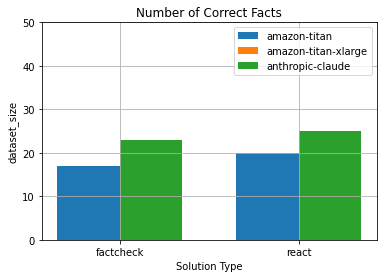

In [11]:
import matplotlib.pyplot as plt

def plot_class_values(classes, values1, values2, value3):
    bar_width = 0.35  # Width of each bar
    
    fig, ax = plt.subplots()
    index = range(len(classes))
    
    bars1 = ax.bar(index, values1, bar_width, label='amazon-titan')
    bars2 = ax.bar([i + bar_width for i in index], values2, bar_width, label='amazon-titan-xlarge')
    bars3 = ax.bar([i + bar_width for i in index], values3, bar_width, label='anthropic-claude')

    
    ax.set_xlabel('Solution Type')
    ax.set_ylabel('dataset_size')
    ax.set_title('Number of Correct Facts')

    ax.set_xticks([i + bar_width/2 for i in index])
    ax.set_xticklabels(classes)
    ax.legend()
    ax.grid(True)
    # Set the maximum value on the y-axis
    plt.ylim(0, 50)
    
    plt.show()

# Example input: class names, value sets for Value 1 and Value 2
classes = ['factcheck', 'react']
#values1 = [10, 25]
values1 = result_titan
#values2 = [20, 15]
values2 = result_titan_tg1_xlarge
values3 = result_claude

plot_class_values(classes, values1, values2, values3)

# Make use of YAML for evaluation
Ref. https://neptune.ai/blog/how-to-manage-track-visualize-hyperparameters
https://www.youtube.com/watch?v=7EcznH0-of8


# Test Self-consistent approach
https://arxiv.org/pdf/2203.11171.pdf


# Finish youtube
https://www.youtube.com/watch?v=7EcznH0-of8

# Check
https://garystafford.medium.com/quantitative-evaluation-of-rag-based-question-answering-chatbot-llm-responses-b833d147f8e6

# Add OpenAI results using fact-check at ./wandb/run-20230828_085918-jhbn610i/logs